In [1]:
## imports for EDA and pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

In [2]:
## read the RData object
data = pyreadr.read_r('../data/children.RData')

In [3]:
## see how the dataframe is called - it's the key of the dictionary
data.keys()

odict_keys(['tmp2'])

In [4]:
## extract the dataframe itself - it's the value of the dictionary
df = data['tmp2']

In [5]:
df

,Stimulus,id,Time,Timing,Latency,Pupil.Confidence,L.Event.Info,R.Event.Info,x,y,...,digit_span,block_span,tcgb_locative,tcgb_flessionali,tcgb_attive_affermative,tcgb_attive_negative,tcgb_passive_affermative,tcgb_passive_negative,tcgb_relative,tcgb_dative
0,item_1_1.avi,C_1,3.572451e+08,0,12823,3,Fixation,Fixation,833.48,344.30,...,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
1,item_1_1.avi,C_1,3.572579e+08,0,2797,3,Fixation,Fixation,833.86,344.96,...,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
2,item_1_1.avi,C_1,3.572607e+08,0,2106,3,Fixation,Fixation,834.43,344.38,...,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
3,item_1_1.avi,C_1,3.572686e+08,0,2468,3,Fixation,Fixation,834.27,344.99,...,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
4,item_1_1.avi,C_1,3.572766e+08,0,1522,3,Fixation,Fixation,832.38,343.94,...,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955454,item_7_6.avi,C_9,4.661656e+09,0,1892,3,Fixation,Fixation,387.48,556.69,...,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955455,item_7_6.avi,C_9,4.661664e+09,0,1694,3,Fixation,Fixation,387.36,558.27,...,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955456,item_7_6.avi,C_9,4.661673e+09,0,1645,3,Fixation,Fixation,388.53,553.91,...,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955457,item_7_6.avi,C_9,4.661681e+09,0,4056,3,Fixation,Fixation,383.87,554.64,...,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5


In [6]:
## check for missing values
df.isnull().sum()

Stimulus                    0
id                          0
Time                        0
Timing                      0
Latency                     0
Pupil.Confidence            0
L.Event.Info                0
R.Event.Info                0
x                           0
y                           0
pupil                       0
pos                         0
ms                          0
condition                   0
direction                   0
number                      0
target_figure               0
target_color                0
distractor_color            0
middle_figure               0
middle_color                0
verb                        0
target.pos                  0
onscreen                    0
aoi.le                      0
aoi.mi                      0
aoi.ri                      0
timing                      0
mv                          0
age                         0
gender                      0
list                        0
response                    0
digit_span

In [7]:
## check that L.Event.Info and R.Event.Info contain only Fixations (Blinks and Saccadic eye movements were excluded)
print(df['L.Event.Info'].value_counts())
print(df['R.Event.Info'].value_counts())

Fixation    1955459
Name: L.Event.Info, dtype: int64
Fixation    1955459
Name: R.Event.Info, dtype: int64


In [8]:
## check that onscreen contains only 1 (looks that fall at the extremes of the screen were excluded)
df['onscreen'].value_counts()

1.0    1955459
Name: onscreen, dtype: int64

In [9]:
## drop unnecessary columns
cols_to_exclude = ['L.Event.Info', 'R.Event.Info', 'mv', 'timing', 'Time', 'Timing', 'Latency', 'Pupil.Confidence',
                   'onscreen', 'pos', 'x', 'y']

df.drop(columns=cols_to_exclude, inplace=True)

In [10]:
pd.set_option('display.max_columns', 35)
df

,Stimulus,id,pupil,ms,condition,direction,number,target_figure,target_color,distractor_color,middle_figure,middle_color,verb,target.pos,aoi.le,aoi.mi,aoi.ri,age,gender,list,response,digit_span,block_span,tcgb_locative,tcgb_flessionali,tcgb_attive_affermative,tcgb_attive_negative,tcgb_passive_affermative,tcgb_passive_negative,tcgb_relative,tcgb_dative
0,item_1_1.avi,C_1,3.680,8.966,filler,lr,1-2-1,gatto,rosso,blu,cane,giallo,acchiappare,R,0.0,1.0,0.0,70,F,1,rosso,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
1,item_1_1.avi,C_1,3.685,21.813,filler,lr,1-2-1,gatto,rosso,blu,cane,giallo,acchiappare,R,0.0,1.0,0.0,70,F,1,rosso,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
2,item_1_1.avi,C_1,3.695,24.630,filler,lr,1-2-1,gatto,rosso,blu,cane,giallo,acchiappare,R,0.0,1.0,0.0,70,F,1,rosso,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
3,item_1_1.avi,C_1,3.720,32.493,filler,lr,1-2-1,gatto,rosso,blu,cane,giallo,acchiappare,R,0.0,1.0,0.0,70,F,1,rosso,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
4,item_1_1.avi,C_1,3.725,40.494,filler,lr,1-2-1,gatto,rosso,blu,cane,giallo,acchiappare,R,0.0,1.0,0.0,70,F,1,rosso,4,4,0.5,2.0,0.0,0.0,4.5,0.5,1.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955454,item_7_6.avi,C_9,4.260,6963.289,OR+1pro,rl,1-2-1,mucca,blu,rosso,cane,giallo,rincorrere,L,1.0,0.0,0.0,65,M,1,blu,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955455,item_7_6.avi,C_9,4.275,6971.680,OR+1pro,rl,1-2-1,mucca,blu,rosso,cane,giallo,rincorrere,L,1.0,0.0,0.0,65,M,1,blu,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955456,item_7_6.avi,C_9,4.265,6980.052,OR+1pro,rl,1-2-1,mucca,blu,rosso,cane,giallo,rincorrere,L,1.0,0.0,0.0,65,M,1,blu,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5
1955457,item_7_6.avi,C_9,4.260,6988.572,OR+1pro,rl,1-2-1,mucca,blu,rosso,cane,giallo,rincorrere,L,1.0,0.0,0.0,65,M,1,blu,2,3,0.5,1.0,2.0,1.5,3.5,0.0,3.5,0.5


In [11]:
## calculate response accuracy --> based on the color of the target animal(s) and the participant's response
df['response_accuracy'] = [1 if df.loc[n,'target_color'] == df.loc[n,'response'] else 0 for n in range(df.shape[0])]

In [12]:
## calculate target feature, whether there is a look to the target or not --> based on target position and whether the participant looks to the LEFT or the RIGHT animal(s)
df['target_looking'] = [1 if (df.loc[n,'target.pos']=='R') & (df.loc[n,'aoi.ri']==1) or (df.loc[n,'target.pos']=='L') & (df.loc[n,'aoi.le']==1) else 0 for n in range(df.shape[0])]

In [13]:
## check that we have 1's and 0's in the target column
print(df['target_looking'].value_counts())

## baseline accuracy --> based on majority class
print(df['target_looking'].value_counts(normalize=True))

0    1252341
1     703118
Name: target_looking, dtype: int64
0    0.640433
1    0.359567
Name: target_looking, dtype: float64


In [14]:
## drop unnecessary columns
df.drop(columns = ['response', 'aoi.le', 'aoi.ri', 'aoi.mi'], inplace=True)

In [15]:
## take columns with TCGB test scores
tcgb_cols = [col for col in df.columns if 'tcgb' in col]

## calculate row-wise average of the TCGB columns
df['tcgb_avg'] = df[tcgb_cols].mean(axis=1)

In [16]:
## take columns with memory test scores (digit_span & block_span)
memory_cols = [col for col in df.columns if 'span' in col]

## calculate row-wise average of the memory columns
df['memory_avg'] = df[memory_cols].mean(axis=1)

In [17]:
## drop original TCGB and memory columns
df.drop(columns = tcgb_cols + memory_cols, inplace=True)

In [18]:
## take columns of categorical (discrete) features
categorical_cols = ['Stimulus','condition','direction','number','target_figure','target_color','distractor_color',
                    'middle_figure','middle_color','verb','target.pos','gender','list']

In [19]:
## dummify the categorical features
categorical_cols_dummy = pd.get_dummies(df[categorical_cols], drop_first=True)

In [20]:
## add to df the dummified data set
df = pd.concat([df.drop(columns=categorical_cols), categorical_cols_dummy], axis=1)

In [21]:
## set the participants ID as the index - we want to predict target looks per participant
df.set_index('id', inplace=True)

In [22]:
df

,pupil,ms,age,response_accuracy,target_looking,tcgb_avg,memory_avg,Stimulus_item_1_2.avi,Stimulus_item_1_3.avi,Stimulus_item_1_4.avi,Stimulus_item_1_5.avi,Stimulus_item_1_6.avi,Stimulus_item_2_1.avi,Stimulus_item_2_2.avi,Stimulus_item_2_3.avi,Stimulus_item_2_4.avi,Stimulus_item_2_5.avi,...,distractor_color_viola,middle_figure_capra,middle_figure_coniglio,middle_figure_leone,middle_figure_orso,middle_figure_pecora,middle_figure_scimmia,middle_color_giallo,middle_color_rosa,middle_color_rosso,middle_color_verde,middle_color_viola,verb_lavare,verb_rincorrere,target.pos_R,gender_M,list_2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C_1,3.680,8.966,70,1,0,1.1875,4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
C_1,3.685,21.813,70,1,0,1.1875,4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
C_1,3.695,24.630,70,1,0,1.1875,4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
C_1,3.720,32.493,70,1,0,1.1875,4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
C_1,3.725,40.494,70,1,0,1.1875,4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_9,4.260,6963.289,65,1,1,1.5625,2.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
C_9,4.275,6971.680,65,1,1,1.5625,2.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
C_9,4.265,6980.052,65,1,1,1.5625,2.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


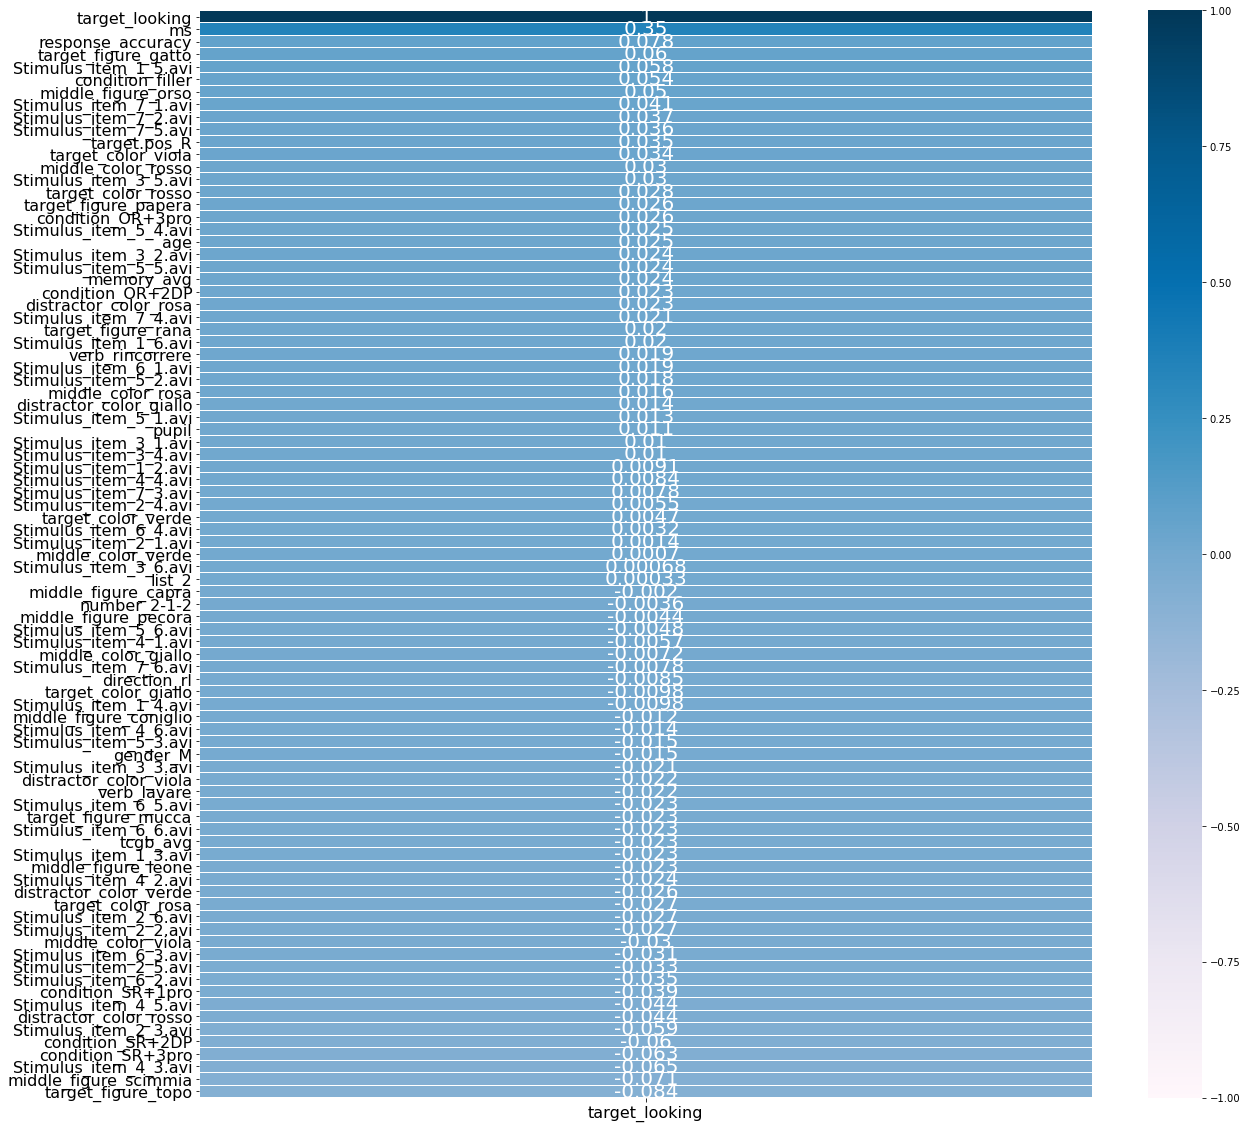

In [23]:
## correlation of the predictor features with the target feature
corr = df.corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr[['target_looking']].sort_values(by='target_looking', ascending=False),
           cmap = 'PuBu',
           annot = True, annot_kws={"size": 20},
           vmin = -1, vmax = 1, linewidth=0.1, linecolor='white');

plt.yticks(size=16);
plt.xticks(size=16);

---

In [50]:
## imports for modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from functions2 import * # self-made function to print out metrics of classification models

In [43]:
## baseline accuracy
df['target_looking'].value_counts(normalize=True)

0    0.640433
1    0.359567
Name: target_looking, dtype: float64

In [44]:
## dividing the data into features (X) and target (y)
features = df.drop(columns='target_looking').columns
X = df[features]
y = df['target_looking']

In [45]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=123)

In [46]:
print(X_train.shape)
print(X_test.shape)

(1759913, 86)
(195546, 86)


In [47]:
## scale the features for the Logistic Regression
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
## Grid Search for hypterparameter tuning
pipe = Pipeline([
    ('logreg', LogisticRegression(solver='liblinear'))
])

params = {
    'logreg__penalty' : ['l1','l2'],
    'logreg__C' : [0.01, 0.1, 1.0]
}

gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=6)

gs.fit(X_train_sc, y_train)

In [48]:
## instantiate and fit a Logistic Regression
logreg = LogisticRegression(solver='liblinear',penalty='l1').fit(X_train_sc, y_train)

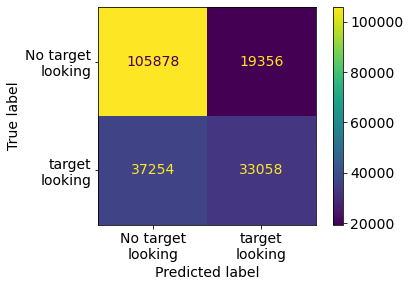

In [49]:
## plot confusion matrix
plt.rcParams.update({'font.size': 14});
plot_confusion_matrix(logreg, X_test_sc, y_test, values_format='d', display_labels=['No target\nlooking', 'target\nlooking']);

In [51]:
## metrics
logreg_scores = model_scores(X_train_sc, y_train, X_test_sc, y_test, logreg)
logreg_scores

,accuracy,specificity,recall,precision,f1,roc_auc
train,0.710725,0.846490,0.468911,0.631674,0.538257,0.657701
test,0.710503,0.845441,0.470162,0.630709,0.538729,0.657801


The most relevant metric in this project is probably the Precision, calculated as the number of observations correctly predicted to belong to the positive class (target looking) divided by the total number of positive predictions, whether correct or not. 

The Logistic Regression's precision, at 0.63, is not very high. We will try to increase it by attempting dimensionality reduction and later on with the XGBoost Classifier.

When comparing the training and testing data scores, we see that there is not so much of a difference. The model does not seem to be overfit.

Next, we will look at the estimated parameter coefficients in the model, to see if the Lasso regularization has pushed any of them to 0. 

In [52]:
## look at the estimated coefficients in the Logistic Regression
pd.set_option('display.max_rows', 90)
pd.DataFrame(data={'coefficient':X_train.columns, 'estimate': logreg.coef_[0]})

,coefficient,estimate
0,pupil,-0.084183
1,ms,0.846039
2,age,0.027168
3,response_accuracy,0.202296
4,tcgb_avg,-0.023524
5,memory_avg,0.025287
6,Stimulus_item_1_2.avi,-0.007704
7,Stimulus_item_1_3.avi,-0.027693
8,Stimulus_item_1_4.avi,-0.054175
9,Stimulus_item_1_5.avi,0.020614


There are no parameters whose coefficient is 0. This might suggest that all the features that were included are informative to predict the target.

We will also perform a Principal Component Analysis (PCA) to check for the most relevant features. 

In [54]:
## PCA
from sklearn.decomposition import PCA

## instantiate and fit the pca object to the data
pca = PCA()
pca.fit(X_train_sc)

## print the cumulative variance explained by the principal components
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance: ', cum_var_exp)

Cumulative explained variance:  [0.05285199 0.09866243 0.13915015 0.17928664 0.21703873 0.25434068
 0.28857278 0.32207802 0.35384364 0.3830043  0.41172489 0.44015772
 0.46684821 0.49277689 0.51838649 0.54325821 0.56653976 0.58935069
 0.61160751 0.63373517 0.6538109  0.67323624 0.69008105 0.70647696
 0.72157368 0.73662176 0.75099375 0.76498337 0.77862542 0.79204025
 0.80515178 0.81810359 0.8309494  0.84371545 0.85631917 0.86876145
 0.88096013 0.89302737 0.9050014  0.91692987 0.9288431  0.94075014
 0.95264492 0.96426061 0.97471718 0.9842612  0.99129744 0.99609615
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


We see that at a certain point, new principal components do not increase the amount of variability in the data that is accounted for by the PCs. We will next print the PC number where the added explanatory power stops. 

In [55]:
## print out the component number and the cumulative explained variance up to that component
[(i, cum_var_exp[i]) for i in range(len(cum_var_exp))]

[(0, 0.05285199326079066),
 (1, 0.09866243418770373),
 (2, 0.13915015275668302),
 (3, 0.1792866414316376),
 (4, 0.21703873059458856),
 (5, 0.25434067521140175),
 (6, 0.288572776184486),
 (7, 0.32207802470090446),
 (8, 0.3538436364058961),
 (9, 0.38300429914122147),
 (10, 0.4117248871583741),
 (11, 0.4401577191532715),
 (12, 0.46684821142814004),
 (13, 0.49277689264730273),
 (14, 0.5183864863850679),
 (15, 0.5432582137944169),
 (16, 0.5665397644899339),
 (17, 0.5893506863253484),
 (18, 0.6116075061787696),
 (19, 0.6337351711333006),
 (20, 0.6538108965442204),
 (21, 0.6732362372395281),
 (22, 0.6900810509308641),
 (23, 0.7064769612825621),
 (24, 0.721573684049274),
 (25, 0.7366217624510916),
 (26, 0.7509937471762792),
 (27, 0.764983368336452),
 (28, 0.7786254207074998),
 (29, 0.7920402486316304),
 (30, 0.8051517828961169),
 (31, 0.8181035904382763),
 (32, 0.8309493983018276),
 (33, 0.8437154549264816),
 (34, 0.8563191700021141),
 (35, 0.8687614519574641),
 (36, 0.8809601269333207),
 (37,

The first 49 PCs cumulatively explain 99.999999% of the variability in the data, so we will try to fit the Logistic Regression again using only 49 PCs.

In [56]:
## Logistic Regression with dimensionality reduction - using PCA
steps = [('pca', PCA(n_components=49)), ('logreg', LogisticRegression(solver='liblinear', penalty='l1'))]
logreg_pca = Pipeline(steps=steps)
logreg_pca.fit(X_train_sc, y_train)

Pipeline(steps=[('pca', PCA(n_components=49)),
                ('logreg',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

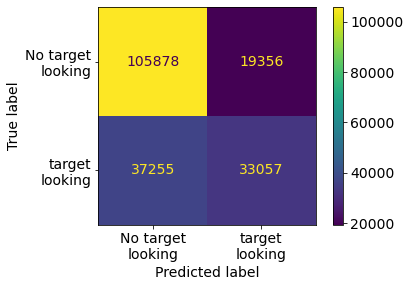

In [57]:
## plot confusion matrix
plt.rcParams.update({'font.size': 14});
plot_confusion_matrix(logreg_pca, X_test_sc, y_test, values_format='d', display_labels=['No target\nlooking', 'target\nlooking']);

In [58]:
## metrics
logreg_pca_scores = model_scores(X_train_sc, y_train, X_test_sc, y_test, logreg_pca)
logreg_pca_scores

,accuracy,specificity,recall,precision,f1,roc_auc
train,0.710726,0.846491,0.468911,0.631675,0.538258,0.657701
test,0.710498,0.845441,0.470147,0.630702,0.538717,0.657794


In [59]:
## print again the metrics without dimensionality reduction
logreg_scores

,accuracy,specificity,recall,precision,f1,roc_auc
train,0.710725,0.846490,0.468911,0.631674,0.538257,0.657701
test,0.710503,0.845441,0.470162,0.630709,0.538729,0.657801


Based on the scores with and without dimensionality reduction, we see that the process did not improve model performance at all. 

Hence, for the XGBoost Classifier we will use all of the features, without dimensionality reduction.

In [60]:
## instantiate an XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', missing=0, seed=123, use_label_encoder=False)

In [61]:
## fit the model to the data 
xgb.fit(X_train, y_train, 
        verbose=False,
        early_stopping_rounds=10,
        eval_metric='logloss',
        eval_set=[(X_test, y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

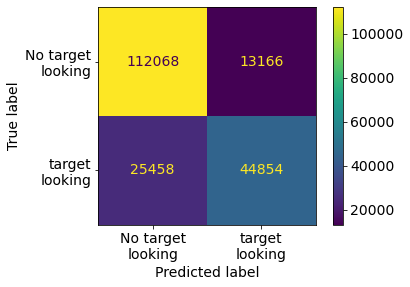

In [62]:
## confusion matrix
plt.rcParams.update({'font.size': 14});
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', display_labels=['No target\nlooking', 'target\nlooking']);

In [64]:
## metrics
xgb_scores = model_scores(X_train, y_train, X_test, y_test, xgb)
xgb_scores

,accuracy,specificity,recall,precision,f1,roc_auc
train,0.804489,0.897205,0.639351,0.777381,0.701642,0.768278
test,0.802481,0.894869,0.637928,0.773078,0.699031,0.766398


In [68]:
## connect the metrics of the two models so that we can see them together
all_metrics = pd.concat([logreg_scores.rename(index={'train':'logreg_train','test':'logreg_test'}), 
                         xgb_scores.rename(index={'train':'xgb_train', 'test':'xgb_test'})], axis=0)
all_metrics

,accuracy,specificity,recall,precision,f1,roc_auc
logreg_train,0.710725,0.846490,0.468911,0.631674,0.538257,0.657701
logreg_test,0.710503,0.845441,0.470162,0.630709,0.538729,0.657801
xgb_train,0.804489,0.897205,0.639351,0.777381,0.701642,0.768278
xgb_test,0.802481,0.894869,0.637928,0.773078,0.699031,0.766398


The XGBoost Classifier improves substantially the model performance, as compared to the Logistic Regression. 

The most relevant metric - Precision - is still not very high, at 0.773 (although it is a lot higher than the Precision of 0.63 yielded by the Logistic Regression). 

---